# CASE STUDY-RETAIL
# WALMART STORE SALES PREDICTION - FORECASTING

In [1]:
#Importing Packages
import os
import numpy as np
import pandas as pd
import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

## Importing data

In [2]:

os.chdir("C:/Users/anubh/Desktop/ML-PROJ/2. Walmart Store Sales Forecasting/data")
features = pd.read_csv('features.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')



In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [6]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [7]:
train_store = pd.merge(train, stores, how='inner', on='Store')
train_final = pd.merge(train_store, features)
train_final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [8]:
test_store = pd.merge(test, stores, how='inner', on='Store')
test_final = pd.merge(test_store, features)
test_final.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [9]:
#Checking column  and their data types
print(train_final.info())

print(test_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB
None
<class 'pandas.core

### Data Preparation :

In [10]:
train_final['Date'] = pd.to_datetime(train_final['Date'])
train_final['Year'] = train_final['Date'].dt.year
train_final['Month'] = train_final['Date'].dt.month
train_final['Quarter'] = train_final['Date'].dt.quarter
train_final['Week'] = train_final['Date'].dt.week
train_final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Quarter,Week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,1,5
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,1,5
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,1,5
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,1,5
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,1,5


### Derived Variable

In [11]:
test_final['Date'] = pd.to_datetime(test_final['Date'])
test_final['Year'] = test_final['Date'].dt.year
test_final['Month'] = test_final['Date'].dt.month
test_final['Quarter'] = test_final['Date'].dt.quarter
test_final['Week'] = test_final['Date'].dt.week
test_final.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Quarter,Week
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2012,11,4,44


In [12]:
def holiday_apply(df, lst, h_name):
    df[h_name] = df['Date'].isin(lst).astype(int)
    return df

In [13]:
super_bowl = [pd.datetime(2010, 2, 12), pd.datetime(2011, 2, 11), pd.datetime(2012, 2, 10), pd.datetime(2013, 2, 8)]
Labour_Day = [pd.datetime(2010, 9, 10), pd.datetime(2011, 9, 9), pd.datetime(2012, 9, 7), pd.datetime(2013, 9, 6)]
Thanksgiving = [pd.datetime(2010, 11, 26), pd.datetime(2011, 11, 25), pd.datetime(2012, 11, 23), pd.datetime(2013, 11, 29)]
Christmas = [pd.datetime(2010, 12, 31), pd.datetime(2011, 12, 30), pd.datetime(2012, 12, 28), pd.datetime(2013, 12, 27)]
holidays = ["Super_Bowl", "Labour_Day", "ThanksGiving", "Christmas"]
lst = [super_bowl, Labour_Day, Thanksgiving, Christmas]
for i in range(4):
    train_final = holiday_apply(train_final, lst[i], holidays[i])
train_final['IsHoliday'] = train_final['Super_Bowl'] | train_final['Labour_Day'] | train_final['ThanksGiving'] | train_final['Christmas']

for i in range(4):
    test_final = holiday_apply(test_final, lst[i], holidays[i])
test_final['IsHoliday'] = test_final['Super_Bowl'] | test_final['Labour_Day'] | test_final['ThanksGiving'] | test_final['Christmas']


### Data Audit

In [14]:
num_final = train_final.loc[:,"Weekly_Sales":"Unemployment"]
num_final = num_final[num_final.columns.difference(["IsHoliday", "Type"])]
num_final.head()

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,Weekly_Sales
0,211.096358,2.572,NaN,NaN,NaN,NaN,NaN,151315,42.31,8.106,24924.50
1,211.096358,2.572,NaN,NaN,NaN,NaN,NaN,151315,42.31,8.106,50605.27
2,211.096358,2.572,NaN,NaN,NaN,NaN,NaN,151315,42.31,8.106,13740.12
3,211.096358,2.572,NaN,NaN,NaN,NaN,NaN,151315,42.31,8.106,39954.04
4,211.096358,2.572,NaN,NaN,NaN,NaN,NaN,151315,42.31,8.106,32229.38


In [15]:
cat_final = train_final[train_final.columns.difference(num_final.columns)]
cat_final.head()

,Christmas,Date,Dept,IsHoliday,Labour_Day,Month,Quarter,Store,Super_Bowl,ThanksGiving,Type,Week,Year
0,0,2010-02-05,1,0,0,2,1,1,0,0,A,5,2010
1,0,2010-02-05,2,0,0,2,1,1,0,0,A,5,2010
2,0,2010-02-05,3,0,0,2,1,1,0,0,A,5,2010
3,0,2010-02-05,4,0,0,2,1,1,0,0,A,5,2010
4,0,2010-02-05,5,0,0,2,1,1,0,0,A,5,2010


In [16]:
#Creating summary for numerical columns
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


In [17]:
num_audit = num_final.apply(var_summary).T
num_audit.to_csv("num_audit.csv")
num_audit

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
CPI,421570.0,0.0,7.217360e+07,171.201947,182.31878,39.159276,1.533449e+03,0.228731,126.064,126.111903,126.496258,128.823806,132.022667,182.31878,212.416993,219.444244,221.941558,225.473509,227.232807
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,0.136421,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,1.144182,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,111248.0,310322.0,3.709708e+08,3334.628621,192.00000,9475.357325,8.978240e+07,2.841503,-265.760,-0.990000,1.950000,6.980000,41.600000,192.00000,1926.940000,8549.740000,16497.470000,50366.600000,104519.540000
MarkDown3,137091.0,284479.0,1.973317e+08,1439.421384,24.60000,9623.078290,9.260364e+07,6.685380,-29.100,0.060000,0.650000,1.650000,5.080000,24.60000,103.990000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,1.859909,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000
MarkDown5,151432.0,270138.0,7.009750e+08,4628.975079,3359.45000,5962.887455,3.555603e+07,1.288166,135.160,351.970000,715.520000,1070.830000,1878.440000,3359.45000,5563.800000,8337.700000,11269.240000,27754.230000,108519.280000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,0.446000,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421570.0,0.0,2.533217e+07,60.090059,62.09000,18.447931,3.403262e+02,0.307005,-2.060,18.300000,27.310000,33.980000,46.680000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Unemployment,421570.0,0.0,3.355819e+06,7.960289,7.86600,1.863296,3.471872e+00,0.234074,3.879,4.156000,5.326000,5.965000,6.891000,7.86600,8.572000,9.816000,12.187000,14.180000,14.313000


In [18]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum()], 
                  index=['N', 'NMISS'])


In [19]:
cat_audit = cat_final.apply(cat_summary).T
cat_audit.to_csv("cat_audit.csv")
display(cat_audit)

,N,NMISS
Christmas,421570,0
Date,421570,0
Dept,421570,0
IsHoliday,421570,0
Labour_Day,421570,0
Month,421570,0
Quarter,421570,0
Store,421570,0
Super_Bowl,421570,0
ThanksGiving,421570,0


### Missing Value Treatment

In [20]:
num_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CPI           421570 non-null  float64
 1   Fuel_Price    421570 non-null  float64
 2   MarkDown1     150681 non-null  float64
 3   MarkDown2     111248 non-null  float64
 4   MarkDown3     137091 non-null  float64
 5   MarkDown4     134967 non-null  float64
 6   MarkDown5     151432 non-null  float64
 7   Size          421570 non-null  int64  
 8   Temperature   421570 non-null  float64
 9   Unemployment  421570 non-null  float64
 10  Weekly_Sales  421570 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 38.6 MB


In [21]:
print(num_final.isnull().sum())

CPI                  0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
Size                 0
Temperature          0
Unemployment         0
Weekly_Sales         0
dtype: int64


In [22]:
num_final = num_final.fillna(0)

In [23]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  int32         
 4   Type          115064 non-null  object        
 5   Size          115064 non-null  int64         
 6   Temperature   115064 non-null  float64       
 7   Fuel_Price    115064 non-null  float64       
 8   MarkDown1     114915 non-null  float64       
 9   MarkDown2     86437 non-null   float64       
 10  MarkDown3     105235 non-null  float64       
 11  MarkDown4     102176 non-null  float64       
 12  MarkDown5     115064 non-null  float64       
 13  CPI           76902 non-null   float64       
 14  Unemployment  76902 non-null   float64       
 15  Year          115

In [24]:
test_final['CPI']=test_final.groupby(by = ["Store", "Dept"])['CPI'].transform(lambda x: x.fillna(x.mean()))
test_final['Unemployment']=test_final.groupby(by = ["Store", "Dept"])['Unemployment'].transform(lambda x: x.fillna(x.mean()))
test_final = test_final.fillna(0)
test_ml = test_final
test_final.to_csv("Test_Filtered")
display(test_final.head())

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Year,Month,Quarter,Week,Super_Bowl,Labour_Day,ThanksGiving,Christmas
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
1,1,2,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
2,1,3,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
3,1,4,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0
4,1,5,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.7,...,223.462779,6.573,2012,11,4,44,0,0,0,0


### Outlier Treatment

In [25]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

#Implementing outlier function 
num_final=num_final.apply(outlier_capping)

In [26]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

### Dummy Variables

In [27]:
dummy_cols = ["Type", "Store", "Dept", "Month", "Week", "Quarter"]
train_ml = pd.concat([num_final, cat_final], axis=1)
for colname in dummy_cols:
    cat_final = create_dummies(cat_final, colname)
cat_final

,Christmas,Date,IsHoliday,Labour_Day,Super_Bowl,ThanksGiving,Year,Type_B,Type_C,Store_2,...,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Quarter_2,Quarter_3,Quarter_4
0,0,2010-02-05,0,0,0,0,2010,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2010-02-05,0,0,0,0,2010,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2010-02-05,0,0,0,0,2010,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2010-02-05,0,0,0,0,2010,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2010-02-05,0,0,0,0,2010,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,2012-10-26,0,0,0,0,2012,1,0,0,...,0,0,0,0,0,0,0,0,0,1
421566,0,2012-10-26,0,0,0,0,2012,1,0,0,...,0,0,0,0,0,0,0,0,0,1
421567,0,2012-10-26,0,0,0,0,2012,1,0,0,...,0,0,0,0,0,0,0,0,0,1
421568,0,2012-10-26,0,0,0,0,2012,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
for colname in dummy_cols:
    test_final = create_dummies(test_final, colname)
test_final.head()

,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Quarter_2,Quarter_3,Quarter_4
0,2012-11-02,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,0,0,0,1
1,2012-11-02,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,0,0,0,1
2,2012-11-02,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,0,0,0,1
3,2012-11-02,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,0,0,0,1
4,2012-11-02,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

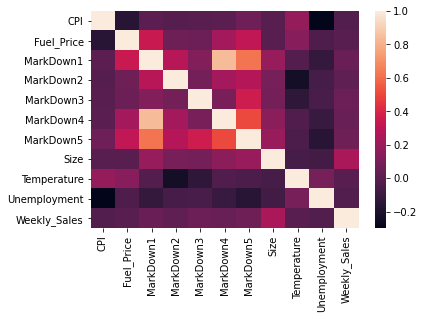

In [29]:
corr_mat = num_final.corr()
corr_mat.to_csv('correlation_matrix.csv')
sns.heatmap(corr_mat)

In [30]:
data_final = pd.concat([num_final, cat_final], axis=1)
data_final.head()

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,...,Week_46,Week_47,Week_48,Week_49,Week_50,Week_51,Week_52,Quarter_2,Quarter_3,Quarter_4
0,211.096358,2.572,0.0,0.0,0.0,0.0,0.0,151315,42.31,8.106,...,0,0,0,0,0,0,0,0,0,0
1,211.096358,2.572,0.0,0.0,0.0,0.0,0.0,151315,42.31,8.106,...,0,0,0,0,0,0,0,0,0,0
2,211.096358,2.572,0.0,0.0,0.0,0.0,0.0,151315,42.31,8.106,...,0,0,0,0,0,0,0,0,0,0
3,211.096358,2.572,0.0,0.0,0.0,0.0,0.0,151315,42.31,8.106,...,0,0,0,0,0,0,0,0,0,0
4,211.096358,2.572,0.0,0.0,0.0,0.0,0.0,151315,42.31,8.106,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

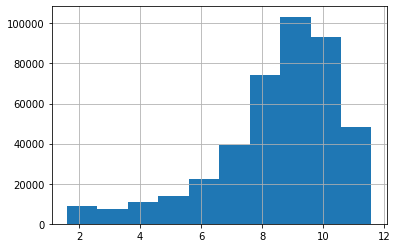

In [31]:
data_final['Log_Weekly_Sales'] = np.log(data_final.Weekly_Sales)
data_final.Log_Weekly_Sales.hist()

In [32]:
data_final.info()
train_data = data_final.drop(["Date", "IsHoliday"], axis=1)
test_final['Month_8'] = 0
test_final['Month_9'] = 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Columns: 210 entries, CPI to Log_Weekly_Sales
dtypes: datetime64[ns](1), float64(11), int32(5), int64(2), uint8(191)
memory usage: 133.1 MB


#### Variable Reduction

In [33]:
#Selecting features
features = train_data[train_data.columns.difference( ['Weekly_Sales', 'Log_Weekly_Sales'] )]
target = train_data['Log_Weekly_Sales']

### RFE

In [34]:
lm = LinearRegression()
#create the RFE model and select 30 attributes
rfe = RFE(lm, n_features_to_select=80)
rfe = rfe.fit(features, target)

In [35]:
#Alternative of capturing the important variables
RFE_features=features.columns[rfe.get_support()]
rfe_var = features[RFE_features]

#### F - Regression

In [36]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(rfe_var, target )

In [37]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(rfe_var.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [38]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(50)

In [39]:
f_var = f_reg_results['Variable']
f_var

39         Store_7
21        Store_16
23        Store_18
44          Type_C
25        Store_22
26        Store_23
27        Store_25
28        Store_29
20        Store_15
29         Store_3
43          Type_B
32        Store_37
33        Store_38
34        Store_42
35        Store_43
36        Store_44
42    ThanksGiving
30        Store_30
38         Store_5
19        Store_12
17       Quarter_4
1          Dept_39
2          Dept_43
3          Dept_78
5         Month_11
6         Month_12
74         Week_51
18        Store_10
73         Week_50
70         Week_48
69         Week_47
14         Month_9
16       Quarter_3
71         Week_49
40         Store_9
77          Week_7
49         Week_14
65         Week_30
52         Week_17
75         Week_52
0        Christmas
22        Store_17
78          Week_8
57         Week_22
13         Month_8
8          Month_3
41      Super_Bowl
76          Week_6
79          Week_9
12         Month_7
Name: Variable, dtype: object

### Modeling 

In [40]:
feature_str = '+'.join(f_var)
model_reg = sm.ols("Log_Weekly_Sales~" + feature_str,data = train_data).fit()

In [41]:
print(model_reg.summary2())

                                   Results: Ordinary least squares
Model:                          OLS                        Adj. R-squared:               0.096       
Dependent Variable:             Log_Weekly_Sales           AIC:                          1757370.7986
Date:                           2021-01-30 17:10           BIC:                          1757918.3857
No. Observations:               421570                     Log-Likelihood:               -8.7864e+05 
Df Model:                       49                         F-statistic:                  910.8       
Df Residuals:                   421520                     Prob (F-statistic):           0.00        
R-squared:                      0.096                      Scale:                        3.7835      
-----------------------------------------------------------------------------------------------------
                   Coef.           Std.Err.         t     P>|t|        [0.025             0.975]     
---------------

### Weekly sales prediction using logistic regression

In [42]:
#Transforming log values into actual values in both training and testing data sets
train_data['pred'] =np.exp(model_reg.predict(train_data))

test_final['Weekly_Sales'] =np.exp(model_reg.predict(test_final))

test_final.to_csv("Logreg_pred.csv")
display(test_final.head())

,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Week_49,Week_50,Week_51,Week_52,Quarter_2,Quarter_3,Quarter_4,Month_8,Month_9,Weekly_Sales
0,2012-11-02,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,1,0,0,7514.668715
1,2012-11-02,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,1,0,0,7514.668715
2,2012-11-02,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,1,0,0,7514.668715
3,2012-11-02,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,1,0,0,7514.668715
4,2012-11-02,0,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,...,0,0,0,0,0,0,1,0,0,7514.668715


In [43]:
#Checking Metrics for both training and testing data sets

print("MAPE for Training data set:")
MAPE_train = np.mean(np.abs(train_data.Weekly_Sales - train_data.pred)/train_data.Weekly_Sales)
print(MAPE_train)
# MAPE_train = np.mean(np.abs(test_reg.Credit_Amount - test_reg.pred)/test_reg.Credit_Amount)
# print(MAPE_train)
print("\nMSE for Training data set:")
#MSE for training and testing data sets                           
print(metrics.mean_squared_error(train_data.Weekly_Sales,train_data.pred)) 
# print(metrics.mean_squared_error(test_reg.Credit_Amount,test_reg.pred))
print("\nRMSE for Training data set")
#RMSE for training and testing data sets                           
print(np.sqrt(metrics.mean_squared_error(train_data.Weekly_Sales,train_data.pred)))
# print(np.sqrt(metrics.mean_squared_error(test_reg.Credit_Amount,test_reg.pred)))

MAPE for Training data set:
22.22545440908454

MSE for Training data set:
512322430.810865

RMSE for Training data set
22634.540658269718


### Residual Analysis

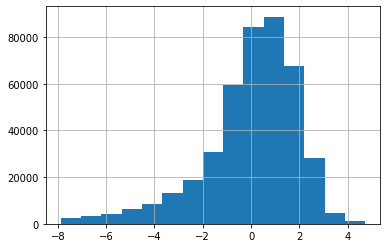

In [44]:
model_reg.resid.hist(bins=15)
model_reg.resid.to_csv("Residual.csv")
# Residuals following Normal distribution. This is one of the Assumption in Linear Regression.

### Decision Trees :

In [45]:
train_ml
train_x = train_ml[train_ml.columns.difference( ['Weekly_Sales', 'Date'] )]
train_x = create_dummies(train_x, 'Type')
train_y = train_ml['Weekly_Sales']

In [46]:
test_ml

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,CPI,Unemployment,Year,Month,Quarter,Week,Super_Bowl,Labour_Day,ThanksGiving,Christmas
0,1,1,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,...,223.462779,6.573000,2012,11,4,44,0,0,0,0
1,1,2,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,...,223.462779,6.573000,2012,11,4,44,0,0,0,0
2,1,3,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,...,223.462779,6.573000,2012,11,4,44,0,0,0,0
3,1,4,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,...,223.462779,6.573000,2012,11,4,44,0,0,0,0
4,1,5,2012-11-02,0,A,151315,55.32,3.386,6766.44,5147.70,...,223.462779,6.573000,2012,11,4,44,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,0,B,118221,76.06,3.804,212.02,851.73,...,192.870729,8.594923,2013,7,3,30,0,0,0,0
115060,45,94,2013-07-26,0,B,118221,76.06,3.804,212.02,851.73,...,192.870729,8.594923,2013,7,3,30,0,0,0,0
115061,45,95,2013-07-26,0,B,118221,76.06,3.804,212.02,851.73,...,192.870729,8.594923,2013,7,3,30,0,0,0,0
115062,45,97,2013-07-26,0,B,118221,76.06,3.804,212.02,851.73,...,192.870729,8.594923,2013,7,3,30,0,0,0,0


In [47]:
data_tree = DecisionTreeRegressor()
data_tree.fit(train_x,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Weekly sales prediction using Decision Tree

In [48]:
#Predicting values for both training and testing data sets
# test_final = test_final.drop(["Weekly_Sales", "Date", "IsHoliday"], axis=1)
test_x = test_ml[test_ml.columns.difference( ['Date'] )]
test_x = create_dummies(test_x, 'Type')
tree_train_pred= data_tree.predict(train_x)
tree_test_pred=data_tree.predict(test_x)

In [49]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training data :")
MAPE_train = np.mean(np.abs(train_y -tree_train_pred)/train_y)
print(MAPE_train)
# MAPE_test = np.mean(np.abs(test_y- tree_test_pred)/test_y)
# print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,tree_train_pred))
print(RMSE_test)
# RMSE_test =np.sqrt(mean_squared_error(test_y,tree_test_pred))
# print(RMSE_test)

MAPE values for training data :
9.299641408690005e-18

RMSE values for training data :
1.7638961453628182e-11


In [50]:
print(data_tree.score(train_x, train_y) * 100)

100.0


In [51]:
test_x['Weekly_Sales'] = tree_test_pred
test_x.to_csv("Decision_Tree.csv")
display(test_x.head())

,CPI,Christmas,Dept,Fuel_Price,IsHoliday,Labour_Day,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Store,Super_Bowl,Temperature,ThanksGiving,Unemployment,Week,Year,Type_B,Type_C,Weekly_Sales
0,223.462779,0,1,3.386,0,0,6766.44,5147.7,50.82,3639.9,...,1,0,55.32,0,6.573,44,2012,0,0,39886.06
1,223.462779,0,2,3.386,0,0,6766.44,5147.7,50.82,3639.9,...,1,0,55.32,0,6.573,44,2012,0,0,47313.62
2,223.462779,0,3,3.386,0,0,6766.44,5147.7,50.82,3639.9,...,1,0,55.32,0,6.573,44,2012,0,0,9189.20
3,223.462779,0,4,3.386,0,0,6766.44,5147.7,50.82,3639.9,...,1,0,55.32,0,6.573,44,2012,0,0,36826.52
4,223.462779,0,5,3.386,0,0,6766.44,5147.7,50.82,3639.9,...,1,0,55.32,0,6.573,44,2012,0,0,31956.07


### 2.2 Random Forest

In [52]:
data_rf = RandomForestRegressor()
data_rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Weekly sales prediction using Random Forest technique

In [53]:
#Predicting values for both training and testing data sets
test_x = test_x.drop(['Weekly_Sales'], axis=1)
rf_train_pred=data_rf.predict(train_x)
rf_test_pred=data_rf.predict(test_x)
test_x['Weekly_Sales'] = rf_test_pred
test_x.to_csv("Random_Forest.csv")
display(test_x.head())

,CPI,Christmas,Dept,Fuel_Price,IsHoliday,Labour_Day,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Store,Super_Bowl,Temperature,ThanksGiving,Unemployment,Week,Year,Type_B,Type_C,Weekly_Sales
0,223.462779,0,1,3.386,0,0,6766.44,5147.7,50.82,3639.9,...,1,0,55.32,0,6.573,44,2012,0,0,33196.0511
1,223.462779,0,2,3.386,0,0,6766.44,5147.7,50.82,3639.9,...,1,0,55.32,0,6.573,44,2012,0,0,46399.0745
2,223.462779,0,3,3.386,0,0,6766.44,5147.7,50.82,3639.9,...,1,0,55.32,0,6.573,44,2012,0,0,11070.3694
3,223.462779,0,4,3.386,0,0,6766.44,5147.7,50.82,3639.9,...,1,0,55.32,0,6.573,44,2012,0,0,38961.4545
4,223.462779,0,5,3.386,0,0,6766.44,5147.7,50.82,3639.9,...,1,0,55.32,0,6.573,44,2012,0,0,27633.4277


In [54]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training data :")
MAPE_train = np.mean(np.abs(train_y - rf_train_pred)/train_y)
print(MAPE_train)


#Root Mean Squared error
print("\nRMSE values for training data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,rf_train_pred))
print(RMSE_test)

MAPE values for training data :
0.20098872554035022

RMSE values for training data :
1006.7593187599804


In [55]:
print(data_rf.score(train_x, train_y) * 100)

99.76531171006741
